In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [2]:
fold0=pd.read_table('../data/data1/fold_0_data.txt')
fold1=pd.read_table('../data/data1/fold_1_data.txt')
fold2=pd.read_table('../data/data1/fold_2_data.txt')
fold3=pd.read_table('../data/data1/fold_3_data.txt')
fold4=pd.read_table('../data/data1/fold_4_data.txt')

In [3]:
df = pd.concat([fold0, fold1, fold2, fold3, fold4], ignore_index=True)
print(df.shape)
df.info()

(19370, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19370 entries, 0 to 19369
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             19370 non-null  object
 1   original_image      19370 non-null  object
 2   face_id             19370 non-null  int64 
 3   age                 19370 non-null  object
 4   gender              18591 non-null  object
 5   x                   19370 non-null  int64 
 6   y                   19370 non-null  int64 
 7   dx                  19370 non-null  int64 
 8   dy                  19370 non-null  int64 
 9   tilt_ang            19370 non-null  int64 
 10  fiducial_yaw_angle  19370 non-null  int64 
 11  fiducial_score      19370 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.8+ MB


In [4]:
df['gender'].unique()

array(['f', 'm', nan, 'u'], dtype=object)

<AxesSubplot:ylabel='gender'>

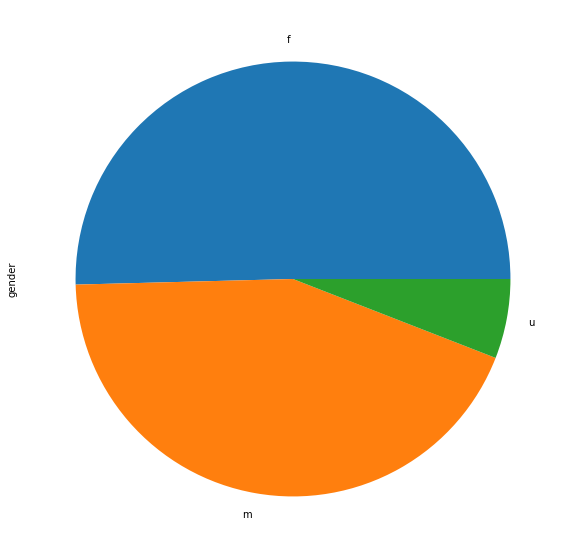

In [5]:
#pir chart 
df.groupby('gender')['gender'].count().plot.pie(figsize=(10, 10))

In [6]:
df['age'].unique()

array(['(25, 32)', '(38, 43)', '(4, 6)', '(60, 100)', '(15, 20)',
       '(48, 53)', '(8, 12)', '(0, 2)', 'None', '(38, 48)', '35', '3',
       '55', '58', '22', '13', '45', '36', '23', '(38, 42)', '(8, 23)',
       '(27, 32)', '57', '56', '2', '29', '34', '42', '46', '32'],
      dtype=object)

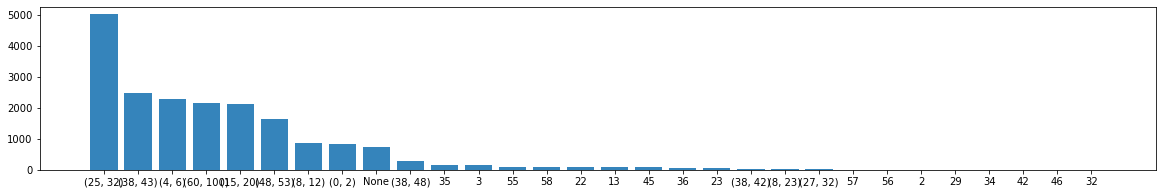

In [7]:
#bar chart
plt.rcParams["figure.figsize"] = (20,3)
age = df['age'].unique()
plt.bar(age, df.age.value_counts(), align='center', alpha=0.9)
plt.show()

# Checking None values

In [8]:
df[df['age'] == 'None']

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
1410,37303189@N08,10295123316_9e9f19b7ce_o.jpg,92,None,NaN,637,951,485,484,-80,0,20
1957,10044155@N06,11345807533_ab928c065a_o.jpg,154,None,NaN,1571,1035,663,663,180,0,14
3452,113528649@N08,11760388013_15a013288d_o.jpg,334,None,NaN,1541,1184,522,522,170,0,104
3457,113528649@N08,11761331016_194bff7414_o.jpg,334,None,NaN,1265,148,918,918,10,0,132
3460,113528649@N08,11769798183_5ec3aa9ae3_o.jpg,334,None,NaN,1910,1290,428,428,-95,0,96
...,...,...,...,...,...,...,...,...,...,...,...,...
19365,7153718@N04,11598838386_349a0d4849_o.jpg,2282,None,NaN,596,460,1472,1473,-75,0,30
19366,7153718@N04,11598166203_c70bb34c80_o.jpg,2283,None,NaN,1179,755,331,331,5,0,108
19367,7153718@N04,11598166203_c70bb34c80_o.jpg,2282,None,NaN,1201,1179,293,293,5,0,99
19368,7153718@N04,11598145163_733cb99713_o.jpg,2282,None,NaN,1027,946,408,408,-85,0,49


# Checking Nan values

In [9]:
df[df['gender'].isna()]

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
1410,37303189@N08,10295123316_9e9f19b7ce_o.jpg,92,None,NaN,637,951,485,484,-80,0,20
1957,10044155@N06,11345807533_ab928c065a_o.jpg,154,None,NaN,1571,1035,663,663,180,0,14
3452,113528649@N08,11760388013_15a013288d_o.jpg,334,None,NaN,1541,1184,522,522,170,0,104
3457,113528649@N08,11761331016_194bff7414_o.jpg,334,None,NaN,1265,148,918,918,10,0,132
3460,113528649@N08,11769798183_5ec3aa9ae3_o.jpg,334,None,NaN,1910,1290,428,428,-95,0,96
...,...,...,...,...,...,...,...,...,...,...,...,...
19365,7153718@N04,11598838386_349a0d4849_o.jpg,2282,None,NaN,596,460,1472,1473,-75,0,30
19366,7153718@N04,11598166203_c70bb34c80_o.jpg,2283,None,NaN,1179,755,331,331,5,0,108
19367,7153718@N04,11598166203_c70bb34c80_o.jpg,2282,None,NaN,1201,1179,293,293,5,0,99
19368,7153718@N04,11598145163_733cb99713_o.jpg,2282,None,NaN,1027,946,408,408,-85,0,49


In [10]:
df.head()

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,0,414,1086,1383,-115,30,17
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,2395,876,771,771,175,-30,74
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34


# checking image rute 

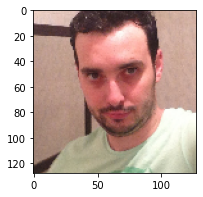

In [11]:
path = "../data/data1/faces/"+df.user_id.loc[1]+"/coarse_tilt_aligned_face."+str(df.face_id.loc[1])+"."+df.original_image.loc[1]
image = load_img(path)
image = image.resize((128, 128)) 
plt.imshow(image)
plt.show()


# Adding images path to dataframe 

In [12]:
imp_data = df[['age', 'gender', 'x', 'y', 'dx', 'dy']].copy()
imp_data.info()

img_path = []
for row in df.iterrows():
    path = "../data/data1/faces/"+row[1].user_id+"/coarse_tilt_aligned_face."+str(row[1].face_id)+"."+row[1].original_image
    img_path.append(path)

imp_data['img_path'] = img_path
imp_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19370 entries, 0 to 19369
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     19370 non-null  object
 1   gender  18591 non-null  object
 2   x       19370 non-null  int64 
 3   y       19370 non-null  int64 
 4   dx      19370 non-null  int64 
 5   dy      19370 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 908.1+ KB


,age,gender,x,y,dx,dy,img_path
0,"(25, 32)",f,0,414,1086,1383,../data/data1/faces/30601258@N03/coarse_tilt_a...
1,"(25, 32)",m,301,105,640,641,../data/data1/faces/30601258@N03/coarse_tilt_a...
2,"(25, 32)",f,2395,876,771,771,../data/data1/faces/30601258@N03/coarse_tilt_a...
3,"(25, 32)",m,752,1255,484,485,../data/data1/faces/30601258@N03/coarse_tilt_a...
4,"(25, 32)",m,175,80,769,768,../data/data1/faces/30601258@N03/coarse_tilt_a...


# mapping age labels 

In [13]:
age_mapping = [('(0, 2)', '0-2'), ('2', '0-2'), ('3', '0-2'), ('(4, 6)', '4-6'), ('(8, 12)', '8-13'), ('13', '8-13'), ('22', '15-20'), ('(8, 23)','15-20'), ('23', '25-32'), ('(15, 20)', '15-20'), ('(25, 32)', '25-32'), ('(27, 32)', '25-32'), ('32', '25-32'), ('34', '25-32'), ('29', '25-32'), ('(38, 42)', '38-43'), ('35', '38-43'), ('36', '38-43'), ('42', '48-53'), ('45', '38-43'), ('(38, 43)', '38-43'), ('(38, 42)', '38-43'), ('(38, 48)', '48-53'), ('46', '48-53'), ('(48, 53)', '48-53'), ('55', '48-53'), ('56', '48-53'), ('(60, 100)', '60+'), ('57', '60+'), ('58', '60+')]
age_mapping_dict = {i[0]: i[1] for i in age_mapping}
age_mapping_dict

{'(0, 2)': '0-2',
 '2': '0-2',
 '3': '0-2',
 '(4, 6)': '4-6',
 '(8, 12)': '8-13',
 '13': '8-13',
 '22': '15-20',
 '(8, 23)': '15-20',
 '23': '25-32',
 '(15, 20)': '15-20',
 '(25, 32)': '25-32',
 '(27, 32)': '25-32',
 '32': '25-32',
 '34': '25-32',
 '29': '25-32',
 '(38, 42)': '38-43',
 '35': '38-43',
 '36': '38-43',
 '42': '48-53',
 '45': '38-43',
 '(38, 43)': '38-43',
 '(38, 48)': '48-53',
 '46': '48-53',
 '(48, 53)': '48-53',
 '55': '48-53',
 '56': '48-53',
 '(60, 100)': '60+',
 '57': '60+',
 '58': '60+'}

# Drop none/nan values 

In [14]:
drop_labels = []
for idx, each in enumerate(imp_data.age):
    if each == 'None':
        drop_labels.append(idx)
    else:
        imp_data.age.loc[idx] = age_mapping_dict[each]

imp_data = imp_data.drop(labels=drop_labels, axis=0) #droped None values
imp_data.age.value_counts(dropna=False)

/home/pj/miniconda3/envs/cv/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


25-32    5296
38-43    2776
0-2      2509
8-13     2292
4-6      2140
15-20    1792
48-53     916
60+       901
Name: age, dtype: int64

In [15]:
imp_data = imp_data.dropna()
clean_data = imp_data[imp_data.gender != 'u'].copy()
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17452 entries, 0 to 19345
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       17452 non-null  object
 1   gender    17452 non-null  object
 2   x         17452 non-null  int64 
 3   y         17452 non-null  int64 
 4   dx        17452 non-null  int64 
 5   dy        17452 non-null  int64 
 6   img_path  17452 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.1+ MB


# Code labels 

In [16]:
gender_to_label_map = {
    'f' : 0,
    'm' : 1
}

clean_data['gender'] = clean_data['gender'].apply(lambda g: gender_to_label_map[g])
clean_data.head()

,age,gender,x,y,dx,dy,img_path
0,25-32,0,0,414,1086,1383,../data/data1/faces/30601258@N03/coarse_tilt_a...
1,25-32,1,301,105,640,641,../data/data1/faces/30601258@N03/coarse_tilt_a...
2,25-32,0,2395,876,771,771,../data/data1/faces/30601258@N03/coarse_tilt_a...
3,25-32,1,752,1255,484,485,../data/data1/faces/30601258@N03/coarse_tilt_a...
4,25-32,1,175,80,769,768,../data/data1/faces/30601258@N03/coarse_tilt_a...


In [17]:
age_to_label_map = {
    '0-2'  :0,
    '4-6'  :1,
    '8-13' :2,
    '15-20':3,
    '25-32':4,
    '38-43':5,
    '48-53':6,
    '60+'  :7
}

clean_data['age'] = clean_data['age'].apply(lambda age: age_to_label_map[age])
clean_data.head()

,age,gender,x,y,dx,dy,img_path
0,4,0,0,414,1086,1383,../data/data1/faces/30601258@N03/coarse_tilt_a...
1,4,1,301,105,640,641,../data/data1/faces/30601258@N03/coarse_tilt_a...
2,4,0,2395,876,771,771,../data/data1/faces/30601258@N03/coarse_tilt_a...
3,4,1,752,1255,484,485,../data/data1/faces/30601258@N03/coarse_tilt_a...
4,4,1,175,80,769,768,../data/data1/faces/30601258@N03/coarse_tilt_a...


In [18]:
clean_data.to_csv('../data/data1/clean_data_full.csv')

# delete some rows to reduce ram memory overload

In [19]:
def get_rows(column, value, qtty):
    to_delete = clean_data.age[clean_data[column] == value].index
    to_delete = np.random.choice(to_delete, qtty)
    return to_delete

var25 = get_rows('age', 4, 5400)
var38= get_rows('age', 5, 1776)
var0= get_rows('age', 0, 1776)
var8= get_rows('age', 2, 1276)
var4= get_rows('age', 1, 1276)

In [20]:
rows = np.concatenate((var25, var38, var0, var8, var4), axis=0)

In [21]:
clean_data = clean_data.drop(index=rows).reset_index()
clean_data_short = clean_data.drop(columns='index').copy()

In [22]:
clean_data_short.age.value_counts()

4    1879
3    1790
5    1465
2    1312
1    1165
6     909
7     895
0     396
Name: age, dtype: int64

In [23]:
clean_data_short.to_csv('../data/data1/clean_data_short.csv')